In [ ]:
import os
import numpy as np
import pandas as pd

import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset
import torch.nn.functional as F

from torchvision import datasets, transforms, utils, models
from torchsummary import summary
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
data_dir='/content/drive/MyDrive/Colab_Notebooks/Leafs'

In [ ]:
dataloader = torch.utils.data.DataLoader(data_dir, batch_size=10)


for (image, label) in enumerate(dataloader):
  print(label)

['/', 'c', 'o', 'n', 't', 'e', 'n', 't', '/', 'd']
['r', 'i', 'v', 'e', '/', 'M', 'y', 'D', 'r', 'i']
['v', 'e', '/', 'C', 'o', 'l', 'a', 'b', '_', 'N']
['o', 't', 'e', 'b', 'o', 'o', 'k', 's', '/', 'L']
['e', 'a', 'f', 's']


In [ ]:
!pip install rembg[gpu]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 61.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.7/47.7 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 12.1 MB/s eta 0:00:00


In [ ]:
import os
import torch
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torchvision.transforms import AutoAugment

# Set the path to the folder containing the images
image_folder = '/content/drive/MyDrive/kaggle/Leafs'

# Set the device for processing (CPU or GPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define the image transformations
transform = transforms.Compose([
    transforms.Resize((512, 512)),  # Resize the images to 512x512
    AutoAugment(),  # Apply AutoAugment policy
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Create a dataset from the image folder
dataset = ImageFolder(image_folder, transform=transform)

# Create a data loader for the dataset
dataloader = torch.utils.data.DataLoader(dataset, batch_size=1, shuffle=False)

# Create a directory to save the augmented images

output_folder = '/content/drive/MyDrive/Colab_Notebooks/aug_leaves'
os.makedirs(output_folder, exist_ok=True)

# Process each image in the dataset
for i, (image, label) in enumerate(dataloader):
    image = image.to(device)
    augmented_image = image.squeeze().cpu()

    # Convert the augmented image to PIL Image format
    augmented_image = (augmented_image * 0.5) + 0.5  # De-normalize the image
    augmented_image = transforms.ToPILImage()(augmented_image)

    # Save the augmented image
    if (label.item()==0):
      output_path = os.path.join(output_folder+'/Bacteria', f'augmented_{i}.png')
      augmented_image.save(output_path)
    elif (label.item()==1):
      output_path = os.path.join(output_folder+'/Fungal', f'augmented_{i}.png')
      augmented_image.save(output_path)
    elif (label.item()==2):
      output_path = os.path.join(output_folder+'/Healthy', f'augmented_{i}.png')
      augmented_image.save(output_path)

    print(f"Saved augmented image: {output_path}")


FileNotFoundError: ignored

In [ ]:
import os
import torch
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torchvision.transforms import AutoAugment

# Set the path to the folder containing the images
image_folder = '/content/drive/MyDrive/Colab_Notebooks/Leafs_test'

# Set the device for processing (CPU or GPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define the image transformations
transform = transforms.Compose([
    transforms.Resize((512, 512)),  # Resize the images to 512x512
    AutoAugment(),  # Apply AutoAugment policy
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Create a dataset from the image folder
dataset = ImageFolder(image_folder, transform=transform)

# Create a data loader for the dataset
dataloader = torch.utils.data.DataLoader(dataset, batch_size=1, shuffle=False)

# Create a directory to save the augmented images

output_folder = '/content/drive/MyDrive/Colab_Notebooks/aug_leaves_test'
os.makedirs(output_folder, exist_ok=True)

# Process each image in the dataset
for i, (image, label) in enumerate(dataloader):
    image = image.to(device)
    augmented_image = image.squeeze().cpu()

    # Convert the augmented image to PIL Image format
    augmented_image = (augmented_image * 0.5) + 0.5  # De-normalize the image
    augmented_image = transforms.ToPILImage()(augmented_image)

    # Save the augmented image
    if (label.item()==0):
      output_path = os.path.join(output_folder+'/Bacteria', f'augmented_{i}.png')
      augmented_image.save(output_path)
    elif (label.item()==1):
      output_path = os.path.join(output_folder+'/Fungal', f'augmented_{i}.png')
      augmented_image.save(output_path)
    elif (label.item()==2):
      output_path = os.path.join(output_folder+'/Healthy', f'augmented_{i}.png')
      augmented_image.save(output_path)

    print(f"Saved augmented image: {output_path}")


In [ ]:
import torch
from torchvision import transforms, datasets

# Define your dataset directory
data_dir = '/content/drive/MyDrive/Colab_Notebooks/Leafs_test'

# Define the transformations
data_transforms = transforms.Compose([
    transforms.Resize((760,760)),
    transforms.ToTensor(),
])

# Load the dataset
augmented_dataset_t = datasets.ImageFolder(root=data_dir, transform=data_transforms)
train_size_t = int(0.8 * len(augmented_dataset_t))
test_size_t = len(augmented_dataset_t) - train_size_t
train_dataset_t, test_dataset_t = torch.utils.data.random_split(augmented_dataset_t, [train_size_t, test_size_t])
# Create a DataLoader to load the augmented dataset
batch_size = 16
dataloader_t = torch.utils.data.DataLoader(train_dataset_t, batch_size=2, shuffle=True)
dataloader_test_t = torch.utils.data.DataLoader(test_dataset_t, batch_size=2)
dataloadercm_t = torch.utils.data.DataLoader(augmented_dataset_t)

In [ ]:
import torch
from torchvision import transforms, datasets

# Define your dataset directory
data_dir = '/content/drive/MyDrive/Colab_Notebooks/aug_leaves'

# Define the transformations
data_transforms = transforms.Compose([
    transforms.Resize((760,760)),
    transforms.ToTensor(),
])

# Load the dataset
augmented_dataset = datasets.ImageFolder(root=data_dir, transform=data_transforms)
train_size = int(0.8 * len(augmented_dataset))
test_size = len(augmented_dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(augmented_dataset, [train_size, test_size])
# Create a DataLoader to load the augmented dataset
batch_size = 16
dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=2, shuffle=True)
dataloader_test = torch.utils.data.DataLoader(test_dataset, batch_size=2)
dataloadercm = torch.utils.data.DataLoader(augmented_dataset)

In [ ]:
import torch
from torchvision import transforms, datasets

# Define your dataset directory
data_dir = '/content/drive/MyDrive/Colab_Notebooks/Leaves_rbg'

# Define the transformations
data_transforms = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(degrees=15),
    transforms.Resize((350,350)),  # Resize the images to 512x512
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load the dataset
augmented_dataset = datasets.ImageFolder(root=data_dir, transform=data_transforms)
train_size = int(0.8 * len(augmented_dataset))
test_size = len(augmented_dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(augmented_dataset, [train_size, test_size])
# Create a DataLoader to load the augmented dataset
batch_size = 16
dataloader = torch.utils.data.DataLoader(train_dataset,  shuffle=True)
dataloadercm = torch.utils.data.DataLoader(augmented_dataset)

In [ ]:
dataloadercm = torch.utils.data.DataLoader(augmented_dataset)

In [ ]:
train_size = int(0.8 * len(output_folder))
test_size = len(output_folder) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(output_folder, [train_size, test_size])
# Create a DataLoader to load the augmented dataset
batch_size = 8
dataloader = torch.utils.data.DataLoader(output_folder,  shuffle=True)
dataloadercm = torch.utils.data.DataLoader(output_folder)

NameError: ignored

In [ ]:

# Define your dataset directory
data_dir_test = '/content/drive/MyDrive/Colab_Notebooks/Leaves_rbg_test'

# Load the dataset
augmented_dataset_test = datasets.ImageFolder(root=data_dir_test, transform=data_transforms)

# Create a DataLoader to load the augmented dataset
batch_size = 16
data_test_loader = torch.utils.data.DataLoader(test_dataset)

In [ ]:

# Define your dataset directory
data_dir_test_wbg = '/content/drive/MyDrive/Colab_Notebooks/Leafs_test'

# Load the dataset
augmented_dataset_test_wbg = datasets.ImageFolder(root=data_dir_test, transform=data_transforms)

# Create a DataLoader to load the augmented dataset
batch_size = 16
data_test_loader_wbg = torch.utils.data.DataLoader(augmented_dataset_test_wbg)

In [ ]:
test_loader = torch.utils.data.DataLoader(augmented_dataset_test)

In [ ]:
classnames = augmented_dataset.classes

In [ ]:
classnames

['Bacterial', 'Fungal', 'Healthy']

In [ ]:
from matplotlib import figure
import torchvision
def show_images(dataset):
    batch = next(iter(dataloader))
    images, labels = batch
    grid = torchvision.utils.make_grid(images, nrow = 4)
    plt.figure(figsize = (11,11))
    plt.imshow(np.transpose(grid, (1,2,0)))
    print("labels ",labels)

labels  tensor([2])


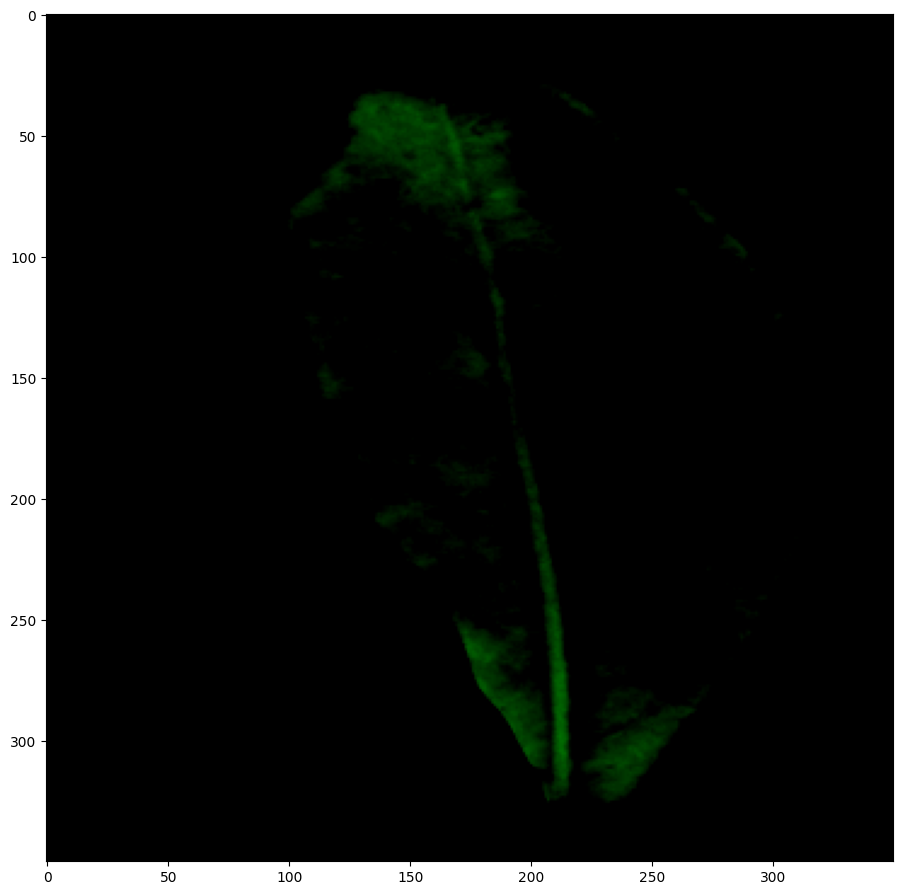

In [ ]:
show_images(augmented_dataset)

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


In [ ]:
class SimpleResidualBlock(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.conv2 = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()

    def forward(self, x):
        out = self.conv1(x)
        out = self.relu1(out)
        out = self.conv2(out)
        return self.relu2(out) + x # ReLU can be applied before or after adding the input
        # for calculating the accuracy
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))


# base class for the model
class ImageClassificationBase(nn.Module):

    def training_step(self, batch):
        images, labels = batch
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss

    def validation_step(self, batch):
        images, labels = batch
        out = self(images)                   # Generate prediction
        loss = F.cross_entropy(out, labels)  # Calculate loss
        acc = accuracy(out, labels)          # Calculate accuracy
        return {"val_loss": loss.detach(), "val_accuracy": acc}

    def validation_epoch_end(self, outputs):
        batch_losses = [x["val_loss"] for x in outputs]
        batch_accuracy = [x["val_accuracy"] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()       # Combine loss
        epoch_accuracy = torch.stack(batch_accuracy).mean()
        return {"val_loss": epoch_loss, "val_accuracy": epoch_accuracy} # Combine accuracies

    def epoch_end(self, epoch, result):
        print("Epoch [{}], last_lr: {:.5f}, train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['lrs'][-1], result['train_loss'], result['val_loss'], result['val_accuracy']))

# Architecture for training

# convolution block with BatchNormalization
def ConvBlock(in_channels, out_channels, pool=False):
    layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
             nn.BatchNorm2d(out_channels),
             nn.ReLU(inplace=True)]
    if pool:
        layers.append(nn.MaxPool2d(4))
    return nn.Sequential(*layers)

# resnet architecture
class ResNet9(ImageClassificationBase):
    def __init__(self, in_channels, num_diseases):
        super().__init__()
        self.conv1 = ConvBlock(in_channels, 64)
        self.conv2 = ConvBlock(64, 128, pool=True) # out_dim : 128 x 64 x 64
        self.res1 = nn.Sequential(ConvBlock(128, 128), ConvBlock(128, 128))
        self.conv3 = ConvBlock(128, 256, pool=True) # out_dim : 256 x 16 x 16
        self.conv4 = ConvBlock(256, 512, pool=True) # out_dim : 512 x 4 x 44
        self.res2 = nn.Sequential(ConvBlock(512, 512), ConvBlock(512, 512))
        self.classifier = nn.Sequential(nn.MaxPool2d(4), nn.Flatten(), nn.Linear(512, num_diseases))

    def forward(self, xb): # xb is the loaded batch
        out = self.conv1(xb)
        out = self.conv2(out)
        out = self.res1(out) + out
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.res2(out) + out
        out = self.classifier(out)
        return out

In [ ]:
model = ResNet9(3, 38)
model = model.to(device)

In [ ]:
model2 = ResNet9(3, 38)
model2 = model2.to(device)

In [ ]:
state_dict = torch.load('/content/drive/MyDrive/Colab_Notebooks/plant-disease-model.pth')
# Load the state dictionary into the model
model.load_state_dict(state_dict)

FileNotFoundError: ignored

In [ ]:
state_dict = torch.load('/content/drive/MyDrive/Colab_Notebooks/plant-disease-model.pth')
# Load the state dictionary into the model
model2.load_state_dict(state_dict)

FileNotFoundError: ignored

In [ ]:
for param in model.parameters():
    param.requires_grad = False

In [ ]:
for param in model2.parameters():
    param.requires_grad = False

In [ ]:
model3 = model
for param in model3.parameters():
    param.requires_grad = False

In [ ]:
print(model)

ResNet9(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=Tr

In [ ]:
last_layer = list(model2.children())[-1]
desired_sublayer = last_layer[:2]

In [ ]:
feature_model = nn.Sequential(*list(model2.children())[:-1])
feature_model.add_module('feature_layer', desired_sublayer)
feature_model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (1): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  )
  (2): Sequential(
    (0): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    

In [ ]:
feature_model = feature_model.to(device)
from torchsummary import summary
summary(feature_model, (3,760,760))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 760, 760]           1,792
       BatchNorm2d-2         [-1, 64, 760, 760]             128
              ReLU-3         [-1, 64, 760, 760]               0
            Conv2d-4        [-1, 128, 760, 760]          73,856
       BatchNorm2d-5        [-1, 128, 760, 760]             256
              ReLU-6        [-1, 128, 760, 760]               0
         MaxPool2d-7        [-1, 128, 190, 190]               0
            Conv2d-8        [-1, 128, 190, 190]         147,584
       BatchNorm2d-9        [-1, 128, 190, 190]             256
             ReLU-10        [-1, 128, 190, 190]               0
           Conv2d-11        [-1, 128, 190, 190]         147,584
      BatchNorm2d-12        [-1, 128, 190, 190]             256
             ReLU-13        [-1, 128, 190, 190]               0
           Conv2d-14        [-1, 256, 1

In [ ]:
outputs_list = []
labels_list = []
feature_model.eval()
with torch.no_grad():
    for data in dataloader:
        image, label = data
        image = image.to(device)
        output = feature_model(image)
        output_np = output.cpu().detach().numpy()
        outputs_list.append(output_np)
        labels_list.append(label)


In [ ]:
outputs_list

In [ ]:
def get_features(dataloader):
    outputs_list = []
    labels_list = []
    feature_model.eval()
    with torch.no_grad():
        for data in dataloader:
            image, label = data
            image = image.to(device)
            output = feature_model(image)
            output_np = output.detach().numpy()
            outputs_list.append(output)
            labels_list.append(label)
    labels_array = np.array(labels_list)
    input_array = np.squeeze(outputs_array)
    normal_array = np.array([tensor.item() for tensor in labels_array])
    input_array = np.squeeze(outputs_array)
    return normal_array, input_array

In [ ]:
normal_array, input_array = get_features(dataloader)

TypeError: ignored

In [ ]:
normal_array_t, input_array_t = get_features(dataloader_test)


TypeError: ignored

In [ ]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
model1 = xgb.XGBClassifier()
train_model1 = model1.fit(input_array,normal_array)

NameError: ignored

In [ ]:
from sklearn.metrics import classification_report
pred1 = train_model1.predict(input_array)
cnt =0;
for i in range(len(pred1)):
    if (pred1[i]!=normal_array[i]):
        cnt+=1;
print(cnt)

NameError: ignored

In [ ]:
from sklearn.metrics import classification_report
pred1 = train_model1.predict(input_array_t)
cnt =0;
for i in range(len(pred1)):
    if (pred1[i]!=normal_array_t[i]):
        print(classnames[pred1[i]]," ",classnames[normal_array_t[i]])
        cnt+=1;


NameError: ignored

In [ ]:
len(pred1)

NameError: ignored

In [ ]:
model1.save_model("xgb.json")

NotFittedError: ignored

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc=SVC()
parameters = [ {'C':[1, 10, 100, 1000], 'kernel':['linear']},
               {'C':[1, 10, 100, 1000], 'kernel':['rbf'], 'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
               {'C':[1, 10, 100, 1000], 'kernel':['poly'], 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05]}
              ]
grid_search = GridSearchCV(estimator = svc,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)
grid_search.fit(input_array,normal_array)

NameError: ignored

In [ ]:
pred1 = grid_search.predict(input_array)
cnt =0;
for i in range(len(pred1)):
    if (pred1[i]!=normal_array[i]):
        print(classnames[pred1[i]]," ",classnames[normal_array[i]])
        cnt+=1;
print(cnt)

NameError: ignored

In [ ]:
import joblib
filename = "svm.joblib"
joblib.dump(grid_search, filename)

['svm.joblib']

In [ ]:
pred1 = grid_search.predict(input_array_t)
cnt =0
for i in range(len(pred1)):
    if (pred1[i]!=normal_array_t[i]):
        print(classnames[pred1[i]]," ",classnames[normal_array_t[i]])
        cnt+=1;
print(cnt)

NameError: ignored

In [ ]:
import os
import glob
from rembg import remove
from PIL import Image

# Specify the directory path where the images are located
directory = '/content/drive/MyDrive/Colab_Notebooks/Leafs/Healthy'

# Define the file extension or pattern to match image files (e.g., '.jpg', '.png')
file_extension = '*.jpg'

# Generate the file path pattern
file_pattern = os.path.join(directory, file_extension)

# Use the glob function to retrieve a list of image file paths
image_files = glob.glob(file_pattern)
count=1
# Loop over each image file path
for image_file in image_files:
    # Process the image file as needed
    output_path = f'/content/drive/MyDrive/Colab_Notebooks/Leaves_rbg/Healthy/img_{count}.png'
    input = Image.open(image_file)
    output = remove(input)
    output.save(output_path)
    count+=1  # Example: Print the file path
import os
import glob
from rembg import remove
from PIL import Image

# Specify the directory path where the images are located
directory = '/content/drive/MyDrive/Colab_Notebooks/Leafs/Bacterial'

# Define the file extension or pattern to match image files (e.g., '.jpg', '.png')
file_extension = '*.jpg'

# Generate the file path pattern
file_pattern = os.path.join(directory, file_extension)

# Use the glob function to retrieve a list of image file paths
image_files = glob.glob(file_pattern)
count=1
# Loop over each image file path
for image_file in image_files:
    # Process the image file as needed
    output_path = f'/content/drive/MyDrive/Colab_Notebooks/Leaves_rbg/Bacterial/img_{count}.png'
    input = Image.open(image_file)
    output = remove(input)
    output.save(output_path)
    count+=1  # Example: Print the file path
import os
import glob
from rembg import remove
from PIL import Image

# Specify the directory path where the images are located
directory = '/content/drive/MyDrive/Colab_Notebooks/Leafs/Fungal'

# Define the file extension or pattern to match image files (e.g., '.jpg', '.png')
file_extension = '*.jpg'

# Generate the file path pattern
file_pattern = os.path.join(directory, file_extension)

# Use the glob function to retrieve a list of image file paths
image_files = glob.glob(file_pattern)
count=1
# Loop over each image file path
for image_file in image_files:
    # Process the image file as needed
    output_path = f'/content/drive/MyDrive/Colab_Notebooks/Leaves_rbg/Fungal/img_{count}.png'
    input = Image.open(image_file)
    output = remove(input)
    output.save(output_path)
    count+=1  # Example: Print the file path

100%|████████████████████████████████████████| 176M/176M [00:00<00:00, 154GB/s]


In [ ]:
import os
import glob
from rembg import remove
from PIL import Image

# Specify the directory path where the images are located
directory = '/content/drive/MyDrive/Colab_Notebooks/Leafs_test/Healthy'

# Define the file extension or pattern to match image files (e.g., '.jpg', '.png')
file_extension = '*.jpg'

# Generate the file path pattern
file_pattern = os.path.join(directory, file_extension)

# Use the glob function to retrieve a list of image file paths
image_files = glob.glob(file_pattern)
count=1
# Loop over each image file path
for image_file in image_files:
    # Process the image file as needed
    output_path = f'/content/drive/MyDrive/Colab_Notebooks/Leaves_rbg_test/Healthy/img_{count}.png'
    input = Image.open(image_file)
    output = remove(input)
    output.save(output_path)
    count+=1  # Example: Print the file path
import os
import glob
from rembg import remove
from PIL import Image

# Specify the directory path where the images are located
directory = '/content/drive/MyDrive/Colab_Notebooks/Leafs_test/Bacterial'

# Define the file extension or pattern to match image files (e.g., '.jpg', '.png')
file_extension = '*.jpg'

# Generate the file path pattern
file_pattern = os.path.join(directory, file_extension)

# Use the glob function to retrieve a list of image file paths
image_files = glob.glob(file_pattern)
count=1
# Loop over each image file path
for image_file in image_files:
    # Process the image file as needed
    output_path = f'/content/drive/MyDrive/Colab_Notebooks/Leaves_rbg_test/Bacterial/img_{count}.png'
    input = Image.open(image_file)
    output = remove(input)
    output.save(output_path)
    count+=1  # Example: Print the file path
import os
import glob
from rembg import remove
from PIL import Image

# Specify the directory path where the images are located
directory = '/content/drive/MyDrive/Colab_Notebooks/Leafs_test/Fungal'

# Define the file extension or pattern to match image files (e.g., '.jpg', '.png')
file_extension = '*.jpg'

# Generate the file path pattern
file_pattern = os.path.join(directory, file_extension)

# Use the glob function to retrieve a list of image file paths
image_files = glob.glob(file_pattern)
count=1
# Loop over each image file path
for image_file in image_files:
    # Process the image file as needed
    output_path = f'/content/drive/MyDrive/Colab_Notebooks/Leaves_rbg_test/Fungal/img_{count}.png'
    input = Image.open(image_file)
    output = remove(input)
    output.save(output_path)
    count+=1  # Example: Print the file path

In [ ]:
PATH = '/content/drive/MyDrive/Colab_Notebooks/feature_extraction_model.pth'
torch.save(feature_model.state_dict(), PATH)

In [ ]:
feature_model

In [ ]:
model2

In [ ]:
num_features = model.classifier[2].in_features
num_classes=3
classifier = nn.Sequential(
    nn.Linear(2048, 25,bias=True),
    nn.ReLU(),
    nn.Linear(25, 10, bias=True),
    nn.ReLU(),
    nn.Linear(10, num_classes)
)
model.classifier[2] = classifier


In [ ]:
num_features = model2.classifier[2].in_features
num_classes=3
classifier = nn.Sequential(
    nn.Linear(num_features, 25,bias=True),
    nn.ReLU(),
    nn.Linear(25, 10, bias=True),
    nn.ReLU(),
    nn.Linear(10, num_classes)
)
model2.classifier[2] = classifier


In [ ]:
state_dict = torch.load('/content/drive/MyDrive/Colab_Notebooks/NN_95_100.pth')
# Load the state dictionary into the model
model2.load_state_dict(state_dict)

NameError: ignored

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)


In [ ]:
model = model.to(device)
from torchsummary import summary
summary(model, (3,760,760))

In [ ]:
model2

In [ ]:
model = model.to(device)
from torchsummary import summary
summary(model, (3,512, 512))

In [ ]:
train_ = []

In [ ]:
def train_nn(model, train_loader, test_loader,  criterion, optimizer, N_epoch):
    # Function to train model and I am evaluating test result on each epoch
    for epoch in range(N_epoch):
        model.train()
        print("Epoch number %d" %(epoch+1))
        running_loss = 0
        running_crt = 0
        total = 0
        for data in train_loader:
            image, label = data
            image = image.to(device)
            label = label.to(device)
            total += label.size(0)
            optimizer.zero_grad()
            output = model(image)
            _, predicted = torch.max(output.data, 1)
            loss = criterion(output, label)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            running_crt += (label==predicted).sum().item()
        epoch_loss = running_loss/len(train_loader)
        epoch_acc = 100.00*running_crt/total
        train_.append(epoch_acc)
        print("%d out of %d %0.3f%% E_acc = %0.3f"%(running_crt, total, epoch_loss, epoch_acc))
        x = eval_model(model, test_loader)
        # if (x>94) and (epoch_acc>95):
        #     PATH = '/content/drive/MyDrive/kaggle/result'+str(epoch_acc)+str(x)+str(epoch)+'.pth'
        #     torch.save(model2.state_dict(), PATH)
        # if (x>98):
        #     PATH = '/content/drive/MyDrive/kaggle/result'+str(epoch_acc)+str(x)+str(epoch)+'.pth'
        #     torch.save(model2.state_dict(), PATH)
    print("finished")
    return model

In [ ]:
test=[]

In [ ]:

def eval_model(model, test_loader):
    # Function evaluates test result
    model.eval()
    predicted_crtly_on_each_epoch = 0
    total = 0

    with torch.no_grad():
        for data in test_loader:
            image, label = data
            image = image.to(device)
            label = label.to(device)
            total += label.size(0)
            output = model(image)
            _, predicted = torch.max(output.data, 1)
            predicted_crtly_on_each_epoch += (predicted==label).sum().item()
    epoch_acc = 100.00*predicted_crtly_on_each_epoch/total
    test.append(epoch_acc)
    print("test %d out of %d E_acc = %0.3f"%(predicted_crtly_on_each_epoch, total, epoch_acc))
    return epoch_acc

In [ ]:
    model3.to(device)

    predicted_crtly_on_each_epoch = 0
    total = 0

    with torch.no_grad():
        for data in test_loader:
            image, label = data
            image = image.to(device)
            label = label.to(device)
            total += label.size(0)
            output = model3(image)
            _, predicted = torch.max(output.data, 1)
            predicted_crtly_on_each_epoch += (predicted==label).sum().item()
    epoch_acc = 100.00*predicted_crtly_on_each_epoch/total
    print("test %d out of %d E_acc = %0.3f"%(predicted_crtly_on_each_epoch, total, epoch_acc))

In [ ]:
dataloader.dataset

In [ ]:
model.to(device)
train_nn(model, dataloader, dataloader_test, loss_fn, optimizer, 30)

In [ ]:
model2.to(device)
train_nn(model2, dataloader, data_test_loader, loss_fn, optimizer,25)

In [ ]:
len(train_)

In [ ]:
plt.plot(train_)
plt.plot(test)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

In [ ]:
PATH = '/content/drive/MyDrive/Colab_Notebooks/large.pth'
torch.save(model.state_dict(), PATH)

In [ ]:
model.to(device)

def Result(model, test_loader):
    model.eval()
    all_pred = torch.tensor([])
    with torch.no_grad():
        for data in test_loader:
            image, label = data
            output = model(image)
            all_pred = torch.cat((all_pred, output), dim=0)
        return all_pred

In [ ]:
model.cpu()

with torch.no_grad():
    test_preds = Result(model,dataloader_test )

In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for data in dataloader_test:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 48 test images: %d %%' % (
    100 * correct / total))

In [ ]:
test_preds.argmax(dim=1)

In [ ]:
augmented_dataset_test.targets

In [ ]:
import sklearn
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(augmented_dataset_t.targets, test_preds.argmax(dim=1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classnames)
disp.plot()
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(augmented_dataset_test.targets, test_preds.argmax(dim=1)))

In [ ]:
test_loader = torch.utils.data.DataLoader('/content/drive/MyDrive/kaggle/Leafs_test')

In [ ]:
dataloadercm = torch.utils.data.DataLoader('/content/drive/MyDrive/kaggle/Leafs_train')

In [ ]:
model.cpu()
with torch.no_grad():
    test_preds = Result(model,dataloadercm_t)